# Top 2010's tracks

In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials # To access authorised Spotify data


CLIENT_ID = 'ed490024ea5f4072810146d4d3dff356'
CLIENT_SECRET = 'b74fa8fd014f4932bb15e79572a104fe'

PLAYLIST_ID = '37i9dQZF1DWYJ5kmTbkZiz' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'time_signature', 'track_href', 'type', 'uri', 'mode', 'duration_ms']
features_df = pd.DataFrame(features).drop(cols_to_drop, axis=1)

In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
features_df.hist(xlabelsize=8, figsize=(12,10))
plt.show()

<Figure size 1200x1000 with 9 Axes>

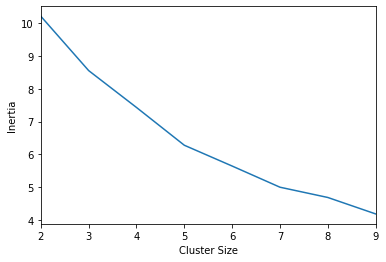

In [3]:
from sklearn.cluster import KMeans

# Scaling
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

# Determining the cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

# Training and Predicting
kmeans_model = KMeans(n_clusters=5, random_state=3).fit(features_df)
preds = kmeans_model.predict(features_df)

In [4]:
# Extracting song and artist names
songs = [x['track']['name'] for x in tracks['items']]
artists = [x['track']['artists'] for x in tracks['items']]

# Concatenating multiple artist names
artist_list = []
for group in artists:
    artist_group = []
    for person in group:
        artist_group.append(person['name'])
    artist_list.append(', '.join(artist_group))

# Adding predictions to dataframe
features_df['cluster'] = preds

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [5]:
clusters.round(3).style.background_gradient(cmap='RdYlGn')

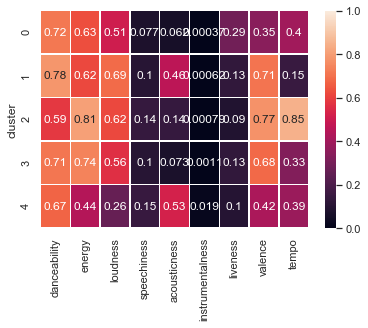

In [6]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns;sns.set()
#%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(clusters, annot=True,vmin=0, vmax=1, linewidths=.5)

In [7]:
clusters.style.background_gradient(cmap='Blues')

# billboard tracks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans
#%matplotlib inline

gettrackFeatures = pd.read_csv('my_data/gettrackFeatures.csv')

In [3]:
cols_to_drop = ['mode', 'duration_ms', 'key','Unnamed: 0']
my_features_df = gettrackFeatures.drop(cols_to_drop, axis=1)

In [4]:
my_features_df=my_features_df[my_features_df['trackID']!='0']
my_features_df

trackID  danceability  energy  loudness  speechiness  \
0      5ayybTSXNwcarDtxQKqvWX         0.474   0.338   -11.528       0.0299   
1      0NEMfVkEjxSVjnG0sJms8v         0.267   0.481    -6.708       0.0378   
2      5LjSxAIKwyZvQqJ04ZQ0Da         0.480   0.628    -7.643       0.0262   
3      2jv9Ppwz9u3lqWfXV0q2sW         0.463   0.524    -8.207       0.0316   
4      6pymOcrCnMuCWdgGVTvUgP         0.697   0.709    -1.917       0.0455   
...                       ...           ...     ...       ...          ...   
28470  1Mg13VMaQj4fhPtQT41vUZ         0.817   0.625    -3.643       0.0719   
28471  3AiNYdRmhXcv7KCFHZOddA         0.625   0.966    -3.908       0.0668   
28472  5w0dh39SYz1ei2tCs7X7Fo         0.685   0.760    -9.354       0.0430   
28473  3GVkPk8mqxz0itaAriG1L7         0.734   0.570    -7.066       0.1330   
28474  17S4XrLvF5jlGvGCJHgF51         0.651   0.766    -9.935       0.0299   

       acousticness  instrumentalness  liveness  valence    tempo  
0            0.6480          0.000000    0.1300    0.810  154.596  
1            0.2840          0.972000    0.1920    0.221  195.041  
2            0.1740          0.000033    0.0753    0.541  143.412  
3            0.0260          0.000000    0.1020    0.308  144.055  
4            0.0452          0.000000    0.1380    0.787  134.910  
...             ...               ...       ...      ...      ...  
28470        0.0508          0.001230    0.0580    0.759  102.907  
28471        0.6090          0.000089    0.0667    0.929  170.194  
28472        0.4300          0.000000    0.0704    0.895  113.569  
28473        0.8470          0.000021    0.1120    0.689  129.953  
28474        0.2060          0.001030    0.3620    0.949  116.740  

[22984 rows x 10 columns]

In [5]:
without_duplicate=my_features_df['trackID'].drop_duplicates().index
my_features_df = my_features_df.loc[without_duplicate]
my_features_df = my_features_df.reset_index()
trackID = my_features_df['trackID']
features_df=my_features_df.drop(['index','trackID'], axis=1)
features_df

danceability  energy  loudness  speechiness  acousticness  \
0             0.474   0.338   -11.528       0.0299        0.6480   
1             0.267   0.481    -6.708       0.0378        0.2840   
2             0.480   0.628    -7.643       0.0262        0.1740   
3             0.463   0.524    -8.207       0.0316        0.0260   
4             0.697   0.709    -1.917       0.0455        0.0452   
...             ...     ...       ...          ...           ...   
22836         0.649   0.851    -6.108       0.0434        0.0128   
22837         0.456   0.893    -9.830       0.1050        0.3500   
22838         0.817   0.625    -3.643       0.0719        0.0508   
22839         0.625   0.966    -3.908       0.0668        0.6090   
22840         0.685   0.760    -9.354       0.0430        0.4300   

       instrumentalness  liveness  valence    tempo  
0              0.000000    0.1300    0.810  154.596  
1              0.972000    0.1920    0.221  195.041  
2              0.000033    0.0753    0.541  143.412  
3              0.000000    0.1020    0.308  144.055  
4              0.000000    0.1380    0.787  134.910  
...                 ...       ...      ...      ...  
22836          0.011500    0.1990    0.639  122.088  
22837          0.005280    0.2000    0.755  183.290  
22838          0.001230    0.0580    0.759  102.907  
22839          0.000089    0.0667    0.929  170.194  
22840          0.000000    0.0704    0.895  113.569  

[22841 rows x 9 columns]

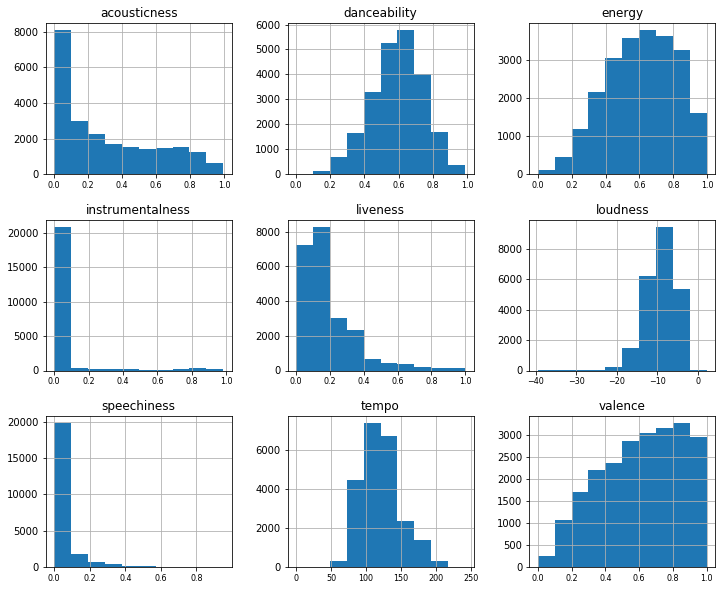

In [6]:
features_df.hist(xlabelsize=8, figsize=(12,10))
plt.show()

[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Cluster Size')]

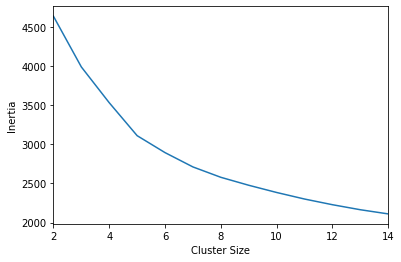

In [7]:
# Scaling
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

# Determining the cluster size
score_list = []
for i in range(2,15):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 15)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")


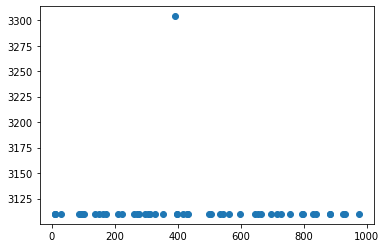

In [7]:
# Determining the cluster size
score_list = []
index_list = np.random.randint(1000, size=50)
for i in index_list:
    kmeans_model = KMeans(n_clusters=5, random_state=i).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
plt.scatter(x=index_list,y=score_list)
plt.show()

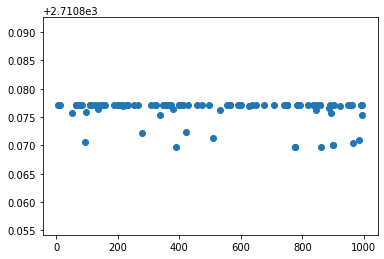

In [8]:
# Determining the cluster size
score_list = [0]*100
index_list = np.random.randint(1000, size=100)
for i,j in enumerate(index_list):
    kmeans_model = KMeans(n_clusters=7, random_state=j,n_jobs=-1).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list[i] = kmeans_model.inertia_

# Visualization of different cluster size performations
plt.scatter(x=index_list,y=score_list)
plt.show()

In [34]:
if 'cluster' in features_df.columns:
    features_df=features_df.drop('cluster', axis=1)
    
# Training and Predicting
kmeans_model = KMeans(n_clusters=5, random_state=42).fit(features_df)
preds = kmeans_model.predict(features_df)
print(kmeans_model.inertia_)

3109.9351095307125


In [35]:
# Adding predictions to dataframe
features_df['cluster'] = preds

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [36]:
clusters.round(3).style.background_gradient(cmap='RdYlGn')

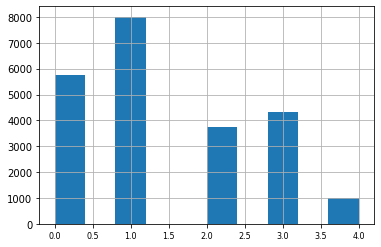

In [37]:
features_df['cluster'].hist(xlabelsize=8, figsize=(6,4))
plt.show()

### PCA

In [38]:

import seaborn as sns
import scipy.stats as st
from sklearn import preprocessing, decomposition, linear_model

In [39]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None,centroid=False,c=0):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            if centroid:
                for i in c.index:
                    plt.scatter(c['F1'][i]/c['F1'].max(),
                             c['F2'][i]/c['F2'].max(),alpha=1, label=i,cmap='veridis')
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.legend()
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None,limit=[],centroid=False,c=0,markersize=1):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
            
            if centroid:
                for i in c.index:
                    plt.scatter(c['F'+str(d1+1)][i],c['F'+str(d2+1)][i],alpha=1,marker='s', label=i,cmap='veridis')
                plt.legend()
                plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
                plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
                plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
                plt.show()
            
            fig = plt.figure(figsize=(7,6))
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value,cmap='veridis',s=markersize)
                plt.legend()
            
            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
            # détermination des limites du graphique
            if limit != []:
                plt.xlim(limit[0])
                plt.ylim(limit[1])
            else :
                boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
                plt.xlim([-boundary,boundary])
                plt.ylim([-boundary,boundary])
                '''
                for i in range(5):
                    j = np.random.randint(len(X_projected))
                    plt.annotate(data.iloc[j].name[1],xy=X_projected[j][0:2], xytext=(-8,5+i),
                arrowprops={'arrowstyle': '->'}, va='center')
                '''
            
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [40]:
illus = features_df.cluster
data = features_df.drop(columns='cluster')
X = data.values
features = data.columns



# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [41]:
n_comp = 6
pca = decomposition.PCA(n_components=n_comp).fit(X_scaled)

X_projected = pca.transform(X_scaled)

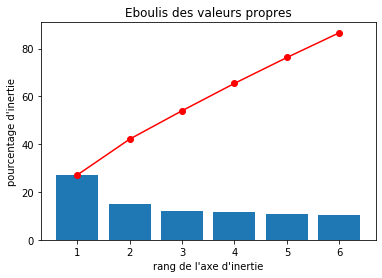

In [42]:
display_scree_plot(pca)

No handles with labels found to put in legend.


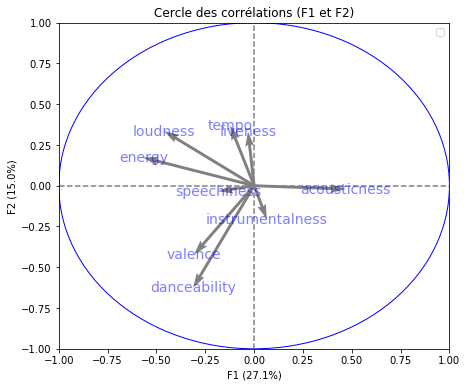

No handles with labels found to put in legend.


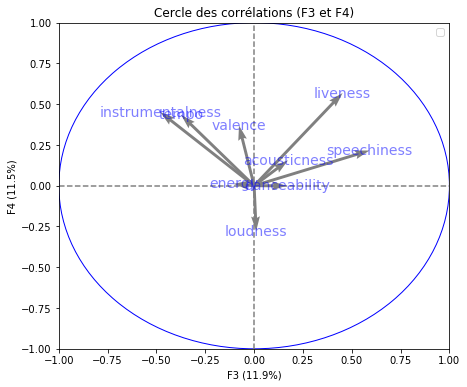

In [43]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

<Figure size 504x432 with 0 Axes>

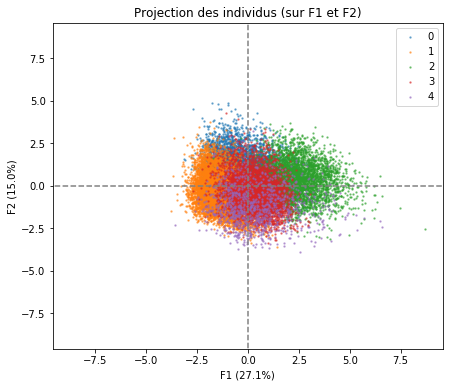

<Figure size 504x432 with 0 Axes>

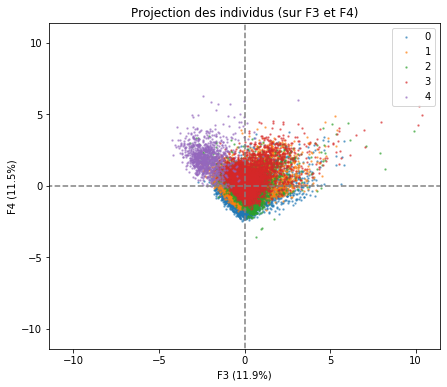

<Figure size 504x432 with 0 Axes>

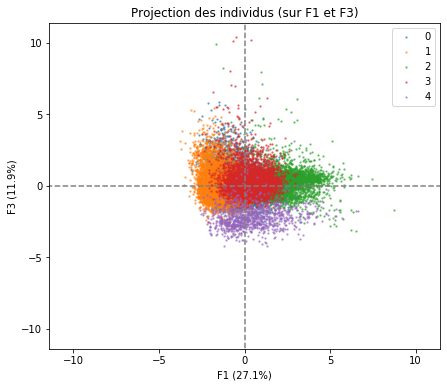

<Figure size 504x432 with 0 Axes>

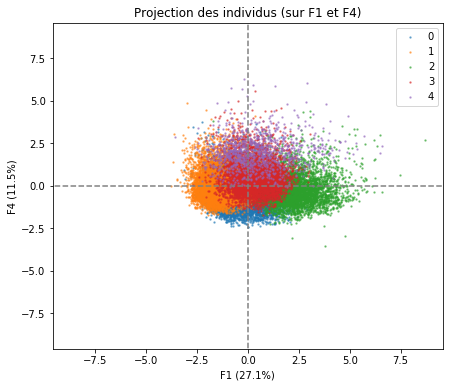

<Figure size 504x432 with 0 Axes>

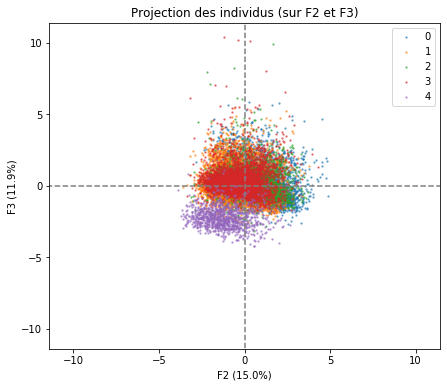

<Figure size 504x432 with 0 Axes>

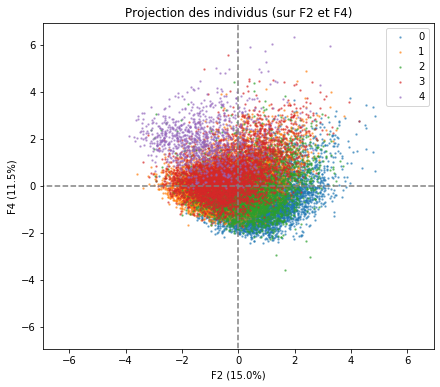

In [44]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(0,2),(0,3),(1,2),(1,3)], 
                         illustrative_var = illus, alpha = 0.5,markersize=2)

In [45]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

          ID        d_i
0          0   6.861007
1          1  44.374404
2          2   2.547436
3          3   4.787873
4          4   6.418779
...      ...        ...
22836  22836   3.398334
22837  22837   8.588416
22838  22838   6.765372
22839  22839  11.779467
22840  22840   3.322175

[22841 rows x 2 columns]


In [46]:
#qualité de représentation des individus - COS2
cos2 = X_projected**2
for j in range(cos2.shape[1]):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

badRpz=[]
for i,j in enumerate(data.index):
    if cos2[i,0] + cos2[i,1] < 0.7 :badRpz.append(j)

print(len(badRpz),"individus mal représentés ")

          id    COS2_1    COS2_2
0          0  0.346559  0.000309
1          1  0.037002  0.091872
2          2  0.006488  0.296448
3          3  0.018948  0.341762
4          4  0.668304  0.003684
...      ...       ...       ...
22836  22836  0.801434  0.025633
22837  22837  0.100134  0.210596
22838  22838  0.444359  0.186551
22839  22839  0.288830  0.021599
22840  22840  0.126815  0.345116

[22841 rows x 3 columns]
[0.91569841 0.9567193  0.97126257 ... 0.83536759 0.63363921 0.77106892]
18427 individus mal représentés 


<Figure size 504x432 with 0 Axes>

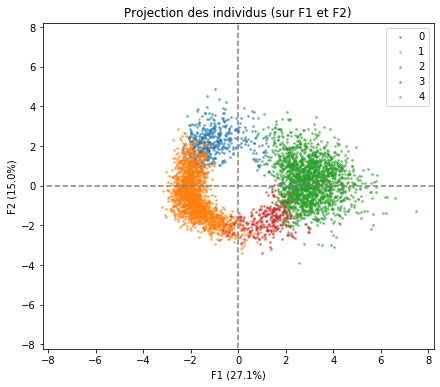

<Figure size 504x432 with 0 Axes>

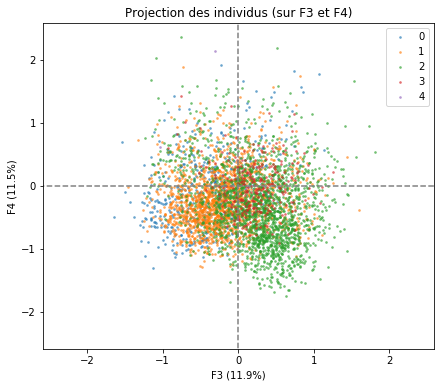

<Figure size 504x432 with 0 Axes>

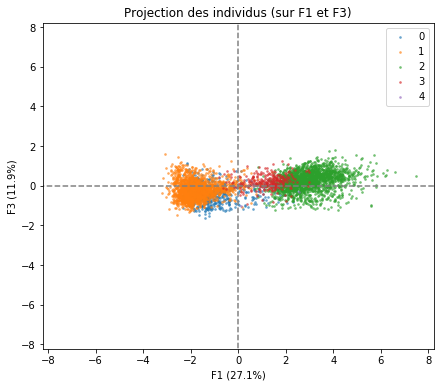

<Figure size 504x432 with 0 Axes>

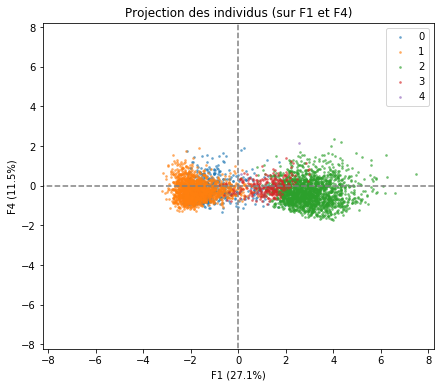

<Figure size 504x432 with 0 Axes>

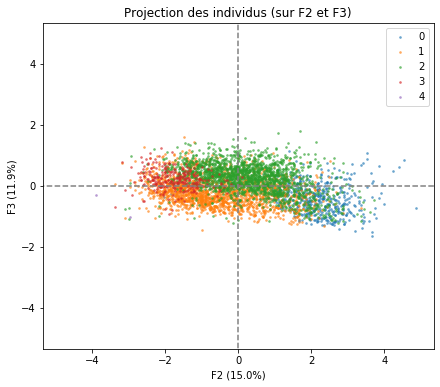

<Figure size 504x432 with 0 Axes>

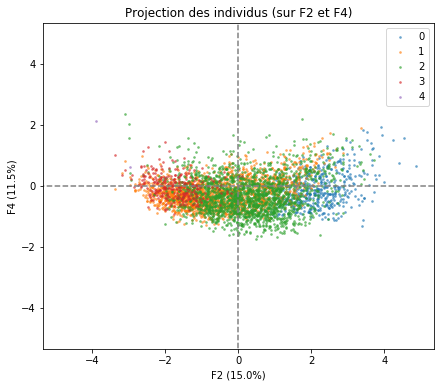

In [47]:
display_factorial_planes(np.delete(X_projected, badRpz, axis=0), n_comp, pca, [(0,1),(2,3),(0,2),(0,3),(1,2),(1,3)], 
                         illustrative_var = illus.drop(index=badRpz), alpha = 0.5,markersize=3)

### 3D PLOT

In [48]:
data = np.delete(X_projected, badRpz, axis=0)
illustrative_var = np.array(illus.drop(index=badRpz))
d1,d2,d3 = 0,1,3
ax = plt.axes(projection='3d')
illustrative_var = np.array(illus.drop(index=badRpz))

for value in np.unique(illustrative_var):
    
    selected = np.where(illustrative_var == value)
    #ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)
    ax.scatter(data[selected, d1], data[selected, d2], data[selected, d3], alpha=0.5, label=value,cmap='veridis',s=3)
    
plt.legend()
plt.show()

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [49]:
data = np.delete(X_projected, badRpz, axis=0)
illustrative_var = np.array(illus.drop(index=badRpz))

In [50]:
dataEXT = pd.DataFrame(data,columns=[0,1,2,3,4,5])

In [51]:
dataEXT['K'] = illustrative_var

In [52]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=[1, 2, 3],  # <-- Put your data instead
    y=[4, 5, 6],  # <-- Put your data instead
    z=[7, 8, 9],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 3,
        'opacity': 0.5,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [53]:
import plotly.express as px

df = dataEXT.copy()
fig = px.scatter_3d(df, x=0, y=1, z=3,
              color='K', opacity=0.4,size=[1 for i in range(len(df))],symbol='K')
fig.show()

In [54]:
import plotly.express as px

df = dataEXT.copy()
df['K'] = df['K'].astype(str)

fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='K', opacity=0.4,size=[0.4 for i in range(len(df))],title="String 'size' values mean discrete colors")
fig.show()

In [55]:
--> carte de densite 

--> 3d plot en function du temps

--> seulement avec le top 10 ou 20

SyntaxError: invalid syntax (<ipython-input-55-9366b9fdf508>, line 1)